<h1 align=center style="font-family: 'Times New Roman', sans-serif">Análisis de Datos</h1>
<h2 align=center style="font-family: 'Times New Roman', sans-serif"> Accidentes Madrid 2019-2023 </h2>

<h>En este notebook vamos a hacer un análisis de datos de <a href="2023_Accidentalidad.xlsx">Accidentalidad </a> para intentar encontrar patrones, nulos, faltantes, registros duplicados o variables insignificantes que no brinden información relevante al proyecto. </h>

## Importar librerías

Importamos las librerias que utilizaremos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Lectura datos y limpieza Accidentalidad

Abrimos los archivos excels como solo un dataframe, para ello listo los dataframes a fusionar y los concateno todos en una lista llamada accidentes_df.

In [2]:
df1 = pd.read_excel('2023_Accidentalidad.xlsx')
df2 = pd.read_excel('2022_Accidentalidad.xlsx')
df3 = pd.read_excel('2021_Accidentalidad.xlsx')
df4 = pd.read_excel('2020_Accidentalidad.xlsx')
df5 = pd.read_excel('2019_Accidentalidad.xlsx')

In [3]:
dataframes = [df1, df2, df3, df4, df5]
accidentes_df = pd.concat(dataframes, ignore_index=True)

Imprimo la informacion y columnas de los datos de accidentes_df para ver los tipos de datos con los que tratatamos.

In [4]:
accidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204238 entries, 0 to 204237
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        204238 non-null  object        
 1   fecha                 204238 non-null  datetime64[ns]
 2   hora                  204238 non-null  object        
 3   localizacion          204238 non-null  object        
 4   numero                204232 non-null  object        
 5   cod_distrito          204232 non-null  float64       
 6   distrito              204232 non-null  object        
 7   tipo_accidente        204233 non-null  object        
 8   estado_meteorológico  182779 non-null  object        
 9   tipo_vehiculo         203416 non-null  object        
 10  tipo_persona          204235 non-null  object        
 11  rango_edad            204238 non-null  object        
 12  sexo                  204238 non-null  object        
 13 

In [5]:
accidentes_df.head(5)

,num_expediente,fecha,hora,localizacion,numero,cod_distrito,distrito,tipo_accidente,estado_meteorológico,tipo_vehiculo,tipo_persona,rango_edad,sexo,cod_lesividad,lesividad,coordenada_x_utm,coordenada_y_utm,positiva_alcohol,positiva_droga
0,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Conductor,De 55 a 59 años,Mujer,14.0,Sin asistencia sanitaria,443397166.0,4.478129e+09,N,NaN
1,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 21 a 24 años,Hombre,14.0,Sin asistencia sanitaria,443397166.0,4.478129e+09,N,NaN
2,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 21 a 24 años,Hombre,14.0,Sin asistencia sanitaria,443397166.0,4.478129e+09,N,NaN
3,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 21 a 24 años,Mujer,7.0,Asistencia sanitaria sólo en el lugar del acci...,443397166.0,4.478129e+09,N,NaN
4,2023S000001,2023-01-01,01:15:00,"AVDA. ALFONSO XIII, 33",33,5.0,CHAMARTÍN,Alcance,Despejado,Todo terreno,Pasajero,De 55 a 59 años,Hombre,7.0,Asistencia sanitaria sólo en el lugar del acci...,443397166.0,4.478129e+09,N,NaN


<hr>
<h2 align=center style="font-family: 'Times New Roman', sans-serif"> Contenidos </h2>

<ul>
    <li>
        <a href="#duplicates">Duplicados</a>
    </li>
    <li>
        <a href="#nulos">Valores nulos o faltantes</a>
    </li>
    <li>
        <a href="#outliers">Valores atípicos</a>
    </li>
</ul>

<hr>

<h3 id="#duplicates" align=center style="font-family: 'Times New Roman', sans-serif; text-decoration: underline">Duplicados</h3>

Para poder trabajar con este dataframe, debemos eliminar los valores duplicados para que no perjudiquen los análisis. Eliminamos los valores duplicados en la siguiente línea.

In [6]:
print(f"Cantidad de registros sin eliminar duplicados: {len(accidentes_df)}.")
accidentes_df.drop_duplicates()
print(f"Cantidad de registros habiendo eliminado duplicados: {len(accidentes_df)}.")

Cantidad de registros sin eliminar duplicados: 204238.
Cantidad de registros habiendo eliminado duplicados: 204238.


Podemos ver que en este dataframe no contiene registros duplicados, por lo que podemos proseguir con los análisis.

<hr>
<h3 id="#nulos" align=center style="font-family: 'Times New Roman', sans-serif; text-decoration: underline">Valores nulos y faltantes</h3>

Observemos que en este dataframe los valores nulos o faltantes no están escritos de la manera tradicional.

In [7]:
accidentes_df.isnull().sum()

num_expediente               0
fecha                        0
hora                         0
localizacion                 0
numero                       6
cod_distrito                 6
distrito                     6
tipo_accidente               5
estado_meteorológico     21459
tipo_vehiculo              822
tipo_persona                 3
rango_edad                   0
sexo                         0
cod_lesividad            92366
lesividad                92366
coordenada_x_utm            33
coordenada_y_utm            33
positiva_alcohol           719
positiva_droga          203628
dtype: int64

'positiva_droga': En positivo_droga hemos visto que en la documentacion de las columnas hecho por la comunidad de madrid es que si el agente que ha realizado el reporte no ha visto indicios de que la persona podria estar bajo los efectos de los estupefacientes no ha sido necesario realizar la prueba, por lo tanto los valores null se rellenaran con 'No realizado'

In [8]:
accidentes_df['positiva_droga'].fillna('No realizado', inplace=True)
conteo_valores = accidentes_df['positiva_droga'].value_counts(dropna=False)
print(conteo_valores)

No realizado    203628
1.0                610
Name: positiva_droga, dtype: int64


'tipo_accidente'-'tipo_persona': Los datos tipo de accidente al no tener ningun referente los rellenaremos segun la moda y para los datos tipo de persona igualmente lo rellenamos con la moda tambien que seria conductores

In [9]:
accidentes_df['tipo_accidente'].fillna(accidentes_df['tipo_accidente'].mode()[0], inplace=True)
accidentes_df['tipo_persona'].fillna(accidentes_df['tipo_persona'].mode()[0], inplace=True)

Al ver que la columna numero no me aporta "nada" de informacion relevante/importante lo que haremos sera eliminar esa columna

In [10]:
accidentes_df.drop('numero', axis=1, inplace=True)

'distrito'-'cod_distrito': Para los valores Null de distrito al ser pocos datos(6 Nulos) vamos a ver la ubicacion y pondremos manualmente los distritos y para la columna cod_distrito al tener ya los valores nulos de la columna distritos rellenaremos segun su repectivo codigo.

In [11]:
filas_con_distrito_nulo = accidentes_df[accidentes_df['distrito'].isnull()]
print(filas_con_distrito_nulo)

       num_expediente      fecha      hora  \
10110     2023S009762 2023-03-16  22:40:00   
103955    2021S015933 2021-09-11  19:40:00   
103956    2021S015933 2021-09-11  19:40:00   
103957    2021S015933 2021-09-11  19:40:00   
147629    2020S016821 2020-11-23  07:45:00   
147630    2020S016821 2020-11-23  07:45:00   

                                             localizacion  cod_distrito  \
10110   GTA. ISIDRO GONZALEZ VELAZQUEZ / CALL. FRANCIS...           NaN   
103955                         AUTOV. M-500 / AUTOV. M-30           NaN   
103956                         AUTOV. M-500 / AUTOV. M-30           NaN   
103957                         AUTOV. M-500 / AUTOV. M-30           NaN   
147629                       AUTOV. M-23, 0 (0.8 ENTRADA)           NaN   
147630                       AUTOV. M-23, 0 (0.8 ENTRADA)           NaN   

       distrito                tipo_accidente estado_meteorológico  \
10110       NaN  Choque contra obstáculo fijo            Despejado   
103955     

In [12]:
filtro_localizacion = accidentes_df['localizacion'] == 'AUTOV. M-23, 0 (0.8 ENTRADA)'
accidentes_df.loc[filtro_localizacion, 'distrito'] = 'MORATALAZ'
accidentes_df.loc[filtro_localizacion, 'cod_distrito'] = 14
filtro_localizacion = accidentes_df['localizacion'] == 'AUTOV. M-500 / AUTOV. M-30'
accidentes_df.loc[filtro_localizacion, 'distrito'] = 'MONCLOA-ARAVACA'
accidentes_df.loc[filtro_localizacion, 'cod_distrito'] = 9
filtro_localizacion = accidentes_df['localizacion'] == 'GTA. ISIDRO GONZALEZ VELAZQUEZ / CALL. FRANCISCO UMBRAL'
accidentes_df.loc[filtro_localizacion, 'distrito'] = 'HORTALEZA'
accidentes_df.loc[filtro_localizacion, 'cod_distrito'] = 16

'tipo_vehiculo': Obtenemos una lista de tipos de accidente únicos presentes en el conjunto de datos luego se itera sobre cada tipo de accidente único para llevar a cabo la imputación de valores nulos en 'tipo_vehiculo' y se filtran las filas del DataFrame que corresponden al tipo de accidente actual, Se determina el tipo de vehículo más común (la moda) para el tipo de accidente actual, Se imputa el tipo de vehículo más común en las filas con valores nulos en 'tipo_vehiculo' y para el tipo de accidente actual.

In [13]:
tipos_accidente_unicos = accidentes_df['tipo_accidente'].unique()
for tipo_accidente in tipos_accidente_unicos:
    filas_tipo_accidente = accidentes_df[accidentes_df['tipo_accidente'] == tipo_accidente]
    tipo_vehiculo_comun = filas_tipo_accidente['tipo_vehiculo'].mode().iloc[0]
    accidentes_df.loc[(accidentes_df['tipo_accidente'] == tipo_accidente) & (accidentes_df['tipo_vehiculo'].isnull()), 'tipo_vehiculo'] = tipo_vehiculo_comun
    conteo_valores = accidentes_df['tipo_vehiculo'].value_counts(dropna=False)
print(conteo_valores)

Turismo                              142157
Motocicleta hasta 125cc               13513
Furgoneta                             13233
Motocicleta > 125cc                    9601
Autobús                                5066
Camión rígido                          4735
Bicicleta                              3538
Ciclomotor                             3015
Todo terreno                           2878
VMU eléctrico                          2055
Tractocamión                            848
Otros vehículos con motor               774
Maquinaria de obras                     556
Bicicleta EPAC (pedaleo asistido)       553
Autobús articulado                      371
Vehículo articulado                     369
Sin especificar                         222
Autobus EMT                             196
Cuadriciclo ligero                      119
Ciclo                                   113
Autocaravana                             61
Cuadriciclo no ligero                    59
Patinete                        

'Positiva_alcohol': Para esta columna hemos implementado la imputación de los valores nulos en la columna basándote en la probabilidad de dar positivo en alcohol para hombres y mujeres. Este enfoque tiene en cuenta la proporción de casos positivos en alcohol para cada género.

In [14]:
df_sin_nulos = accidentes_df.dropna(subset=['positiva_alcohol'])
conteo_valores = df_sin_nulos['positiva_alcohol'].value_counts()
probabilidad_S = conteo_valores.get('S', 0) / len(df_sin_nulos)
probabilidad_N = conteo_valores.get('N', 0) / len(df_sin_nulos)
print(f"Probabilidad de 'S' respecto a registros sin NaN: {probabilidad_S}")
print(f"Probabilidad de 'N' respecto a registros sin NaN: {probabilidad_N}")

Probabilidad de 'S' respecto a registros sin NaN: 0.029166809978429534
Probabilidad de 'N' respecto a registros sin NaN: 0.9708331900215704


In [15]:
import random
probabilidad_S = 0.030432239394125978
probabilidad_N = 0.969567760605874
def rellenar_positiva_alcohol(valor):
    if pd.isna(valor):
        return 'S' if random.random() < probabilidad_S else 'N'
    else:
        return valor
accidentes_df['positiva_alcohol'] = accidentes_df['positiva_alcohol'].apply(rellenar_positiva_alcohol)
conteo_valores = accidentes_df['positiva_alcohol'].value_counts(dropna=False)
print(conteo_valores)

N    198280
S      5958
Name: positiva_alcohol, dtype: int64


'lesividad': En este código itera sobre cada tipo de accidente único en tu conjunto de datos y, para cada tipo de accidente, encuentra la lesividad más común (moda) y luego imputa los valores nulos en 'lesividad' para ese tipo de accidente específico.

In [16]:
tipos_accidente_unicos = accidentes_df['tipo_accidente'].unique()
for tipo_accidente in tipos_accidente_unicos:
    filas_tipo_accidente = accidentes_df[accidentes_df['tipo_accidente'] == tipo_accidente]
    lesividad_comun = filas_tipo_accidente['lesividad'].mode().iloc[0]
    accidentes_df.loc[(accidentes_df['tipo_accidente'] == tipo_accidente) & (accidentes_df['lesividad'].isnull()), 'lesividad'] = lesividad_comun

'cod_lesividad': Para codigo de lesividad directamente asigno el codigo correspondiente por tipo de lesividad

In [17]:
accidentes_df.loc[accidentes_df['lesividad'] == 'Atención en urgencias sin posterior ingreso', 'cod_lesividad'] = 1.0
accidentes_df.loc[accidentes_df['lesividad'] == 'Ingreso inferior o igual a 24 horas', 'cod_lesividad'] = 2.0
accidentes_df.loc[accidentes_df['lesividad'] == 'Ingreso superior a 24 horas', 'cod_lesividad'] = 3.0
accidentes_df.loc[accidentes_df['lesividad'] == 'Fallecido 24 horas', 'cod_lesividad'] = 4.0
accidentes_df.loc[accidentes_df['lesividad'] == 'Asistencia sanitaria ambulatoria con posterioridad', 'cod_lesividad'] = 5.0
accidentes_df.loc[accidentes_df['lesividad'] == 'Asistencia sanitaria inmediata en centro de salud o mutua', 'cod_lesividad'] = 6.0
accidentes_df.loc[accidentes_df['lesividad'] == 'Asistencia sanitaria sólo en el lugar del accidente', 'cod_lesividad'] = 7.0
accidentes_df.loc[accidentes_df['lesividad'] == 'Sin asistencia sanitaria', 'cod_lesividad'] = 14.0
accidentes_df.loc[accidentes_df['lesividad'] == 'Se desconoce', 'cod_lesividad'] = 77.0

'estado_meteorológico':  para cada fecha en el conjunto de datos se asigna esa moda a las filas con valores nulos en 'estado_meteorológico' que coinciden con esa fecha. De esta manera, se imputan valores nulos basándose en la información de la fecha asociada a cada observació

In [18]:
modas_por_fecha = accidentes_df.groupby('fecha')['estado_meteorológico'].apply(lambda x: x.mode().iloc[0])
accidentes_df['estado_meteorológico'].fillna(accidentes_df['fecha'].map(modas_por_fecha), inplace=True)

Convierto las coordenadas y_utm y x_utm a formato decimal ya que he visto que los null eran por que el formato eran erroneos

In [19]:
accidentes_df['coordenada_x_utm'] = accidentes_df['coordenada_x_utm'].astype(str)
accidentes_df['coordenada_y_utm'] = accidentes_df['coordenada_y_utm'].astype(str)
print(accidentes_df[['coordenada_x_utm', 'coordenada_y_utm']].head())


  coordenada_x_utm coordenada_y_utm
0      443397166.0     4478129388.0
1      443397166.0     4478129388.0
2      443397166.0     4478129388.0
3      443397166.0     4478129388.0
4      443397166.0     4478129388.0


In [20]:
accidentes_df.isnull().sum()

num_expediente          0
fecha                   0
hora                    0
localizacion            0
cod_distrito            0
distrito                0
tipo_accidente          0
estado_meteorológico    0
tipo_vehiculo           0
tipo_persona            0
rango_edad              0
sexo                    0
cod_lesividad           0
lesividad               0
coordenada_x_utm        0
coordenada_y_utm        0
positiva_alcohol        0
positiva_droga          0
dtype: int64

Ahora que ya no tenemos valores nulos procedemos a ver si tenemos algun valor atipico

<hr>
<h3 id="#outliers" align=center style="font-family: 'Times New Roman', sans-serif; text-decoration: underline">Valores atípicos</h3>

In [21]:
accidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204238 entries, 0 to 204237
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        204238 non-null  object        
 1   fecha                 204238 non-null  datetime64[ns]
 2   hora                  204238 non-null  object        
 3   localizacion          204238 non-null  object        
 4   cod_distrito          204238 non-null  float64       
 5   distrito              204238 non-null  object        
 6   tipo_accidente        204238 non-null  object        
 7   estado_meteorológico  204238 non-null  object        
 8   tipo_vehiculo         204238 non-null  object        
 9   tipo_persona          204238 non-null  object        
 10  rango_edad            204238 non-null  object        
 11  sexo                  204238 non-null  object        
 12  cod_lesividad         204238 non-null  float64       
 13 

In [22]:
print(accidentes_df.describe())
print(accidentes_df.describe(include='object'))

        cod_distrito  cod_lesividad
count  204238.000000  204238.000000
mean        9.912597      11.742609
std         5.647869       4.055599
min         1.000000       1.000000
25%         5.000000       7.000000
50%        10.000000      14.000000
75%        15.000000      14.000000
max        21.000000      77.000000
       num_expediente      hora          localizacion            distrito  \
count          204238    204238                204238              204238   
unique          87507      1419                 47587                  21   
top       2022S002867  18:00:00  AUTOV. M-30, +01100I  PUENTE DE VALLECAS   
freq               36      1808                   378               16210   

                 tipo_accidente estado_meteorológico tipo_vehiculo  \
count                    204238               204238        204238   
unique                       13                    7            40   
top     Colisión fronto-lateral            Despejado       Turismo   
freq      

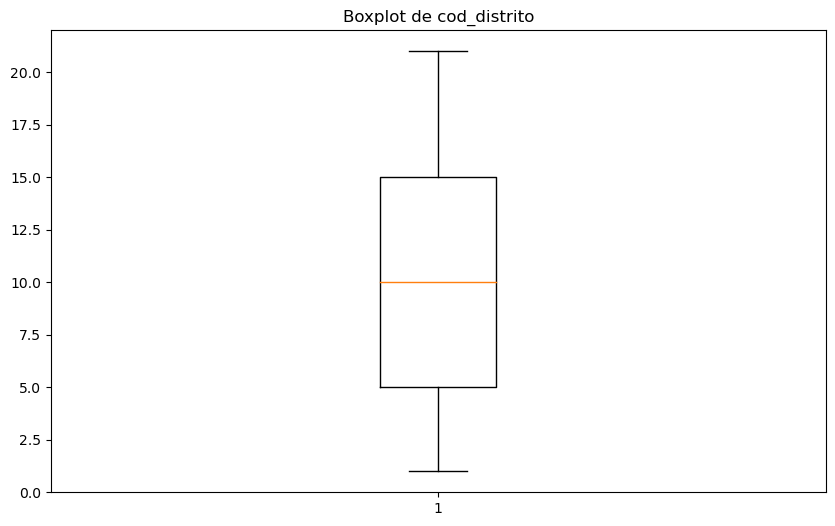

In [23]:
plt.figure(figsize=(10, 6))
plt.boxplot(accidentes_df['cod_distrito'])
plt.title('Boxplot de cod_distrito')
plt.show()

Al examinar la distribución de los datos en la columna cod_distrito, se observa que los valores están dentro de rangos razonables y no muestran ninguna discrepancia significativa. Los boxplots revelan una dispersión normal de los datos sin puntos extremos que sugieran la presencia de valores atípicos. Además, los estadísticos descriptivos, como la media, la mediana y los percentiles, respaldan la consistencia de los datos, sin indicar valores inusuales o extremos. En resumen, no hay evidencia de valores atípicos en estas columnas según el análisis realizado.

<h2 align=center style="font-family: 'Times New Roman', sans-serif">Actuaciones Bomberos</h2>

## Lectura datos y limpieza Actuaciones bomberos


In [24]:
df1 = pd.read_excel('ActuacionesBomberos_2023.xlsx')
df2 = pd.read_excel('ActuacionesBomberos_2022.xlsx')
df3 = pd.read_excel('ActuacionesBomberos_2021.xlsx')
df4 = pd.read_excel('ActuacionesBomberos_2020.xlsx')
df5 = pd.read_excel('ActuacionesBomberos_2019.xlsx')
df6 = pd.read_excel('ActuacionesBomberos_2018.xlsx')

In [25]:
dataframes = [df1, df2, df3, df4, df5, df6]
bomberos_df = pd.concat(dataframes, ignore_index=True)

In [26]:
bomberos_df.info()
bomberos_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AÑO                       1495 non-null   int64  
 1   MES                       1493 non-null   object 
 2   DISTRITO                  1493 non-null   object 
 3   FUEGOS                    1493 non-null   float64
 4   DAÑOS EN CONSTRUCCION     1493 non-null   float64
 5   SALVAMENTOS Y RESCATES    1493 non-null   float64
 6   DAÑOS POR AGUA            1493 non-null   float64
 7   INCIDENTES DIVERSOS       1493 non-null   float64
 8   SALIDAS SIN INTERVENCION  1493 non-null   float64
 9   SERVICIOS VARIOS          1493 non-null   float64
 10  TOTAL                     1493 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 128.6+ KB


,AÑO,MES,DISTRITO,FUEGOS,DAÑOS EN CONSTRUCCION,SALVAMENTOS Y RESCATES,DAÑOS POR AGUA,INCIDENTES DIVERSOS,SALIDAS SIN INTERVENCION,SERVICIOS VARIOS,TOTAL
0,2023,septiembre,CENTRO,31.0,46.0,75.0,37.0,68.0,10.0,7.0,274.0
1,2023,septiembre,ARGANZUELA,16.0,11.0,34.0,16.0,21.0,6.0,4.0,108.0
2,2023,septiembre,RETIRO,9.0,11.0,29.0,14.0,27.0,4.0,0.0,94.0
3,2023,septiembre,SALAMANCA,14.0,34.0,42.0,34.0,27.0,5.0,4.0,160.0
4,2023,septiembre,CHAMARTIN,8.0,13.0,20.0,16.0,49.0,2.0,6.0,114.0
5,2023,septiembre,TETUAN,20.0,22.0,41.0,36.0,23.0,5.0,2.0,149.0
6,2023,septiembre,CHAMBERI,13.0,28.0,51.0,28.0,29.0,2.0,1.0,152.0
7,2023,septiembre,FUENCARRAL,16.0,6.0,31.0,43.0,53.0,4.0,3.0,156.0
8,2023,septiembre,MONCLOA,9.0,13.0,30.0,18.0,36.0,5.0,4.0,115.0
9,2023,septiembre,LATINA,31.0,10.0,58.0,27.0,38.0,3.0,1.0,168.0


<hr>
<h2 align=center style="font-family: 'Times New Roman', sans-serif"> Contenidos </h2>

<ul>
    <li>
        <a href="#duplicates">Duplicados</a>
    </li>
    <li>
        <a href="#nulos">Valores nulos o faltantes</a>
    </li>
</ul>

<hr>

<h3 id="#duplicates" align=center style="font-family: 'Times New Roman', sans-serif; text-decoration: underline">Duplicados</h3>

In [27]:
print(f"Cantidad de registros sin eliminar duplicados: {len(bomberos_df)}.")
bomberos_df.drop_duplicates()
print(f"Cantidad de registros habiendo eliminado duplicados: {len(bomberos_df)}.")

Cantidad de registros sin eliminar duplicados: 1495.
Cantidad de registros habiendo eliminado duplicados: 1495.


Podemos ver que en este dataframe no contiene registros duplicados, por lo que podemos proseguir con los análisis.

<hr>
<h3 id="#nulos" align=center style="font-family: 'Times New Roman', sans-serif; text-decoration: underline">Valores nulos y faltantes</h3>

In [28]:
bomberos_df.isnull().sum()

AÑO                         0
MES                         2
DISTRITO                    2
FUEGOS                      2
DAÑOS EN CONSTRUCCION       2
SALVAMENTOS Y RESCATES      2
DAÑOS POR AGUA              2
INCIDENTES DIVERSOS         2
SALIDAS SIN INTERVENCION    2
SERVICIOS VARIOS            2
TOTAL                       2
dtype: int64

Vamos que los valores faltantes solo son 2 en todas las filas, por lo que vamos a ver manualmente que filas son.

In [29]:
filas_con_nulo = bomberos_df[bomberos_df['DISTRITO'].isnull()]
print(filas_con_nulo)

      AÑO  MES DISTRITO  FUEGOS  DAÑOS EN CONSTRUCCION  \
976  2020  NaN      NaN     NaN                    NaN   
977  2020  NaN      NaN     NaN                    NaN   

     SALVAMENTOS Y RESCATES  DAÑOS POR AGUA  INCIDENTES DIVERSOS  \
976                     NaN             NaN                  NaN   
977                     NaN             NaN                  NaN   

     SALIDAS SIN INTERVENCION  SERVICIOS VARIOS  TOTAL  
976                       NaN               NaN    NaN  
977                       NaN               NaN    NaN  


Al ser solo dos filas entre 1237 por eliminar estas filas no perderemos mucha informacion ya que para rellenar esos valores nulos no tenemos ninguna informacion mas que el año.

In [30]:
bomberos_df.dropna(inplace=True)
bomberos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1493 entries, 0 to 1494
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AÑO                       1493 non-null   int64  
 1   MES                       1493 non-null   object 
 2   DISTRITO                  1493 non-null   object 
 3   FUEGOS                    1493 non-null   float64
 4   DAÑOS EN CONSTRUCCION     1493 non-null   float64
 5   SALVAMENTOS Y RESCATES    1493 non-null   float64
 6   DAÑOS POR AGUA            1493 non-null   float64
 7   INCIDENTES DIVERSOS       1493 non-null   float64
 8   SALIDAS SIN INTERVENCION  1493 non-null   float64
 9   SERVICIOS VARIOS          1493 non-null   float64
 10  TOTAL                     1493 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 140.0+ KB


<h2 align=center style="font-family: 'Times New Roman', sans-serif">Aforos Tráfico</h2>

## Lectura datos y limpieza Actuaciones bomberos

In [31]:
df1  = pd.read_excel('DatosEstacionesEnero2022.xlsx')
df2  = pd.read_excel('DatosEstacionesFebrero2022.xlsx')
df3  = pd.read_excel('DatosEstacionesMarzo2022.xlsx')
df4  = pd.read_excel('DatosEstacionesAbril2022.xlsx')
df5  = pd.read_excel('DatosEstacionesMayo2022.xlsx')
df6  = pd.read_excel('DatosEstacionesJunio2022.xlsx')
df7  = pd.read_excel('DatosEstacionesJulio2022.xlsx')
df8  = pd.read_excel('DatosEstacionesAgosto2022.xlsx')
df9  = pd.read_excel('DatosEstacionesSeptiembre2022.xlsx')
df10 = pd.read_excel('DatosEstacionesOctubre2022.xlsx')
df11 = pd.read_excel('DatosEstacionesNoviembre2022.xlsx')
df12 = pd.read_excel('DatosEstacionesDiciembre2022.xlsx')

In [32]:
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df8, df9, df10, df11, df12]
aforo_df = pd.concat(dataframes, ignore_index=True)

In [33]:
aforo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71924 entries, 0 to 71923
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FDIA      71744 non-null  datetime64[ns]
 1   FEST      71744 non-null  object        
 2   FSEN      71744 non-null  object        
 3   HOR1      71744 non-null  float64       
 4   HOR2      71744 non-null  float64       
 5   HOR3      71744 non-null  float64       
 6   HOR4      71744 non-null  float64       
 7   HOR5      71744 non-null  float64       
 8   HOR6      71744 non-null  float64       
 9   HOR7      71744 non-null  float64       
 10  HOR8      71744 non-null  float64       
 11  HOR9      71744 non-null  float64       
 12  HOR10     71744 non-null  float64       
 13  HOR11     71744 non-null  float64       
 14  HOR12     71744 non-null  float64       
 15  Nº        180 non-null    float64       
 16  ESTACIÓN  180 non-null    object        
 17  LATITUD   18

Leyendo la documentacion de estos datos vemos que:

1-    Sentido 1. Datos tomados de 1:00 a 12:00 

1=   Sentido 1. Datos tomados de 13:00 a 24:00 

2-    Sentido 2. Datos tomados de 1:00 a 12:00 

2=   Sentido 2. Datos tomados de 13:00 a 24:00 

In [34]:
aforo_df.head(10)

,FDIA,FEST,FSEN,HOR1,HOR2,HOR3,HOR4,HOR5,HOR6,HOR7,HOR8,HOR9,HOR10,HOR11,HOR12,Nº,ESTACIÓN,LATITUD,LONGITUD
0,2022-01-01,ES01,1-,1107.0,588.0,303.0,235.0,194.0,275.0,242.0,137.0,137.0,172.0,237.0,383.0,NaN,NaN,NaN,NaN
1,2022-01-01,ES01,1=,613.0,641.0,394.0,412.0,614.0,922.0,1266.0,1587.0,958.0,729.0,526.0,342.0,NaN,NaN,NaN,NaN
2,2022-01-01,ES01,2-,832.0,553.0,329.0,273.0,251.0,371.0,317.0,155.0,158.0,184.0,334.0,520.0,NaN,NaN,NaN,NaN
3,2022-01-01,ES01,2=,532.0,509.0,412.0,566.0,791.0,1180.0,1287.0,1004.0,615.0,551.0,341.0,298.0,NaN,NaN,NaN,NaN
4,2022-01-01,ES02,1-,200.0,410.0,391.0,300.0,221.0,201.0,182.0,155.0,132.0,124.0,152.0,194.0,NaN,NaN,NaN,NaN
5,2022-01-01,ES02,1=,302.0,330.0,360.0,294.0,302.0,432.0,586.0,407.0,418.0,449.0,366.0,272.0,NaN,NaN,NaN,NaN
6,2022-01-01,ES02,2-,466.0,893.0,795.0,645.0,457.0,389.0,453.0,364.0,245.0,243.0,279.0,391.0,NaN,NaN,NaN,NaN
7,2022-01-01,ES02,2=,529.0,635.0,702.0,530.0,579.0,768.0,918.0,1058.0,1121.0,1010.0,819.0,634.0,NaN,NaN,NaN,NaN
8,2022-01-01,ES03,1-,335.0,918.0,578.0,279.0,208.0,140.0,174.0,376.0,241.0,273.0,359.0,451.0,NaN,NaN,NaN,NaN
9,2022-01-01,ES03,1=,635.0,778.0,950.0,535.0,442.0,617.0,782.0,929.0,799.0,723.0,450.0,301.0,NaN,NaN,NaN,NaN


In [35]:
aforo_df = aforo_df.drop(columns=['Nº', 'ESTACIÓN', 'LATITUD', 'LONGITUD'])

In [36]:
for i in range(13, 25):
    aforo_df[f'HOR{i}'] = 0.0

mask_sentido_1 = aforo_df['FSEN'] == '1='
for i in range(13, 25):
    aforo_df.loc[mask_sentido_1, f'HOR{i}'] = aforo_df.loc[mask_sentido_1, f'HOR{i - 12}']
mask_sentido_2 = aforo_df['FSEN'] == '2='
for i in range(13, 25):
    aforo_df.loc[mask_sentido_2, f'HOR{i}'] = aforo_df.loc[mask_sentido_2, f'HOR{i - 12}']
    
aforo_df.loc[mask_sentido_1, 'HOR1':'HOR12'] = 0.0
aforo_df.loc[mask_sentido_2, 'HOR1':'HOR12'] = 0.0

print(aforo_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71924 entries, 0 to 71923
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FDIA    71744 non-null  datetime64[ns]
 1   FEST    71744 non-null  object        
 2   FSEN    71744 non-null  object        
 3   HOR1    71744 non-null  float64       
 4   HOR2    71744 non-null  float64       
 5   HOR3    71744 non-null  float64       
 6   HOR4    71744 non-null  float64       
 7   HOR5    71744 non-null  float64       
 8   HOR6    71744 non-null  float64       
 9   HOR7    71744 non-null  float64       
 10  HOR8    71744 non-null  float64       
 11  HOR9    71744 non-null  float64       
 12  HOR10   71744 non-null  float64       
 13  HOR11   71744 non-null  float64       
 14  HOR12   71744 non-null  float64       
 15  HOR13   71924 non-null  float64       
 16  HOR14   71924 non-null  float64       
 17  HOR15   71924 non-null  float64       
 18  HOR16 

In [37]:
aforo_df.head(10)

,FDIA,FEST,FSEN,HOR1,HOR2,HOR3,HOR4,HOR5,HOR6,HOR7,...,HOR15,HOR16,HOR17,HOR18,HOR19,HOR20,HOR21,HOR22,HOR23,HOR24
0,2022-01-01,ES01,1-,1107.0,588.0,303.0,235.0,194.0,275.0,242.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2022-01-01,ES01,1=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,394.0,412.0,614.0,922.0,1266.0,1587.0,958.0,729.0,526.0,342.0
2,2022-01-01,ES01,2-,832.0,553.0,329.0,273.0,251.0,371.0,317.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-01-01,ES01,2=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,412.0,566.0,791.0,1180.0,1287.0,1004.0,615.0,551.0,341.0,298.0
4,2022-01-01,ES02,1-,200.0,410.0,391.0,300.0,221.0,201.0,182.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2022-01-01,ES02,1=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,360.0,294.0,302.0,432.0,586.0,407.0,418.0,449.0,366.0,272.0
6,2022-01-01,ES02,2-,466.0,893.0,795.0,645.0,457.0,389.0,453.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2022-01-01,ES02,2=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,702.0,530.0,579.0,768.0,918.0,1058.0,1121.0,1010.0,819.0,634.0
8,2022-01-01,ES03,1-,335.0,918.0,578.0,279.0,208.0,140.0,174.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2022-01-01,ES03,1=,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,950.0,535.0,442.0,617.0,782.0,929.0,799.0,723.0,450.0,301.0


<h2 align=center style="font-family: 'Times New Roman', sans-serif">Radares</h2>

## Lectura datos radares

In [38]:
radares_df = pd.read_excel('RADARES FIJOS_vDTT.xlsx')
radares_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Nº
RADAR            29 non-null     int64  
 1   Ubicacion           29 non-null     object 
 2   DISTRITOS           29 non-null     int64  
 3   Carretara o vial    28 non-null     object 
 4   UBICACIÓN
Calle 30  21 non-null     object 
 5   PK                  28 non-null     object 
 6   Sentido             26 non-null     object 
 7   Tipo                26 non-null     object 
 8   X (WGS84)           16 non-null     float64
 9   Y (WGS84)           16 non-null     float64
 10  Longitud            29 non-null     float64
 11  Latitud             29 non-null     float64
 12  Coordenadas         29 non-null     object 
dtypes: float64(4), int64(2), object(7)
memory usage: 3.1+ KB


In [39]:
radares_df.isnull().sum()

Nº\nRADAR               0
Ubicacion               0
DISTRITOS               0
Carretara o vial        1
UBICACIÓN\nCalle 30     8
PK                      1
Sentido                 3
Tipo                    3
X (WGS84)              13
Y (WGS84)              13
Longitud                0
Latitud                 0
Coordenadas             0
dtype: int64

Vemos que el dataframe de radares ya esta completamente limpio por lo que ya procederemos con el analisis descriptivo y exploratorio.

## Analisis descriptivo y exploratorio

In [40]:
accidentes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204238 entries, 0 to 204237
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   num_expediente        204238 non-null  object        
 1   fecha                 204238 non-null  datetime64[ns]
 2   hora                  204238 non-null  object        
 3   localizacion          204238 non-null  object        
 4   cod_distrito          204238 non-null  float64       
 5   distrito              204238 non-null  object        
 6   tipo_accidente        204238 non-null  object        
 7   estado_meteorológico  204238 non-null  object        
 8   tipo_vehiculo         204238 non-null  object        
 9   tipo_persona          204238 non-null  object        
 10  rango_edad            204238 non-null  object        
 11  sexo                  204238 non-null  object        
 12  cod_lesividad         204238 non-null  float64       
 13 

Empezamos realizando un recuento de variables categoricas

In [41]:
categoricas_count = accidentes_df.select_dtypes(include=['object']).nunique()
print(categoricas_count)

num_expediente          87507
hora                     1419
localizacion            47587
distrito                   21
tipo_accidente             13
estado_meteorológico        7
tipo_vehiculo              40
tipo_persona                3
rango_edad                 18
sexo                        3
lesividad                   9
coordenada_x_utm        78705
coordenada_y_utm        83601
positiva_alcohol            2
positiva_droga              2
dtype: int64


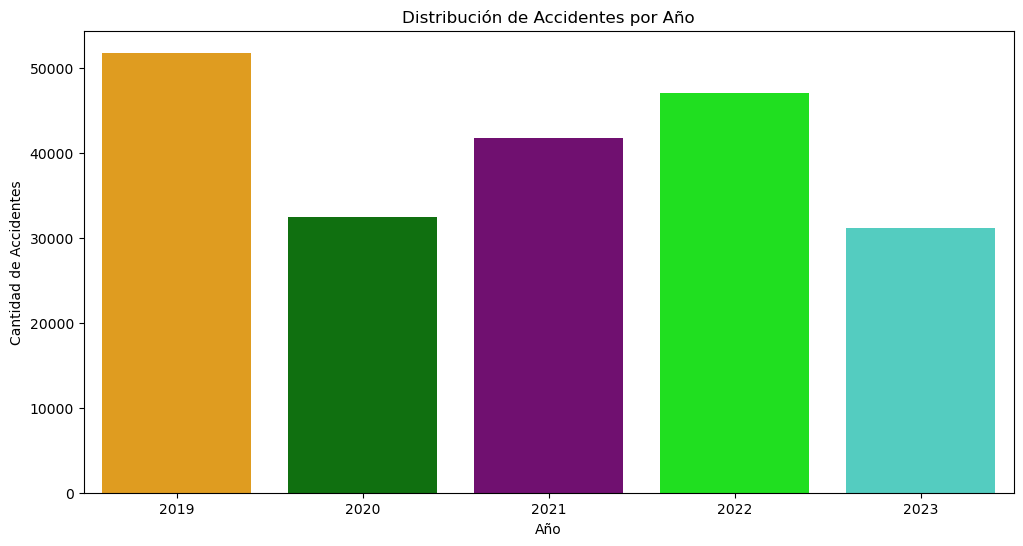

In [42]:
colores_año = {2019: 'orange', 2020: 'green', 2021: 'purple', 2022: 'lime', 2023: 'turquoise'}
plt.figure(figsize=(12, 6))
sns.countplot(x=accidentes_df['fecha'].dt.year, palette=colores_año)
plt.title('Distribución de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.show()


Vemos que en 2019 haz muchos accidentes superando el umbral de 50.000 y que el siguiente año disminuyo drasticamente esto podria ser cupa de la pandemia y segun se fueron quitando las restricciones fue aumentando profguesivamente la cantidad de accidnetes hassta superar los 45.000 en 2022 que fue cuando ya volvimos a la normalidad, pero tambien podemos observar que en 2023 hay un gran desplome, una razón es que el tráfico podría disminuir. Esto podría deberse a una serie de factores, como el aumento del teletrabajo, el aumento de los precios de la gasolina y tambien es que el año no ha acabado.

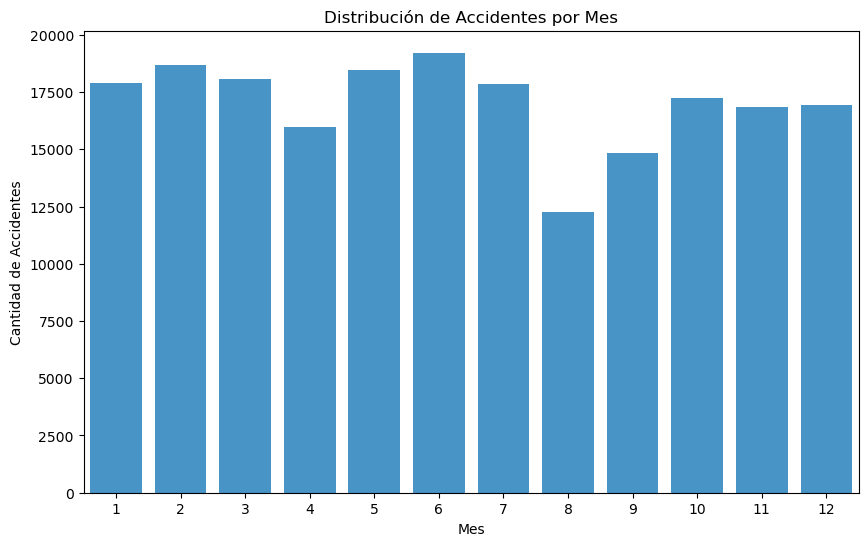

In [43]:
# Gráfico de barras para la distribución de accidentes por mes
plt.figure(figsize=(10, 6))
sns.countplot(x=accidentes_df['fecha'].dt.month, data=accidentes_df, color='#3498db')
plt.title('Distribución de Accidentes por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.show()


Como se puede ver, el número de accidentes es mayor en los meses de verano, especialmente en junio, julio.
Este aumento puede deberse a una serie de factores, como el aumento del tráfico, las condiciones meteorológicas más favorables y las vacaciones.
Las condiciones meteorológicas más favorables también pueden contribuir al aumento de los accidentes en verano. En verano, el tiempo suele ser más cálido y soleado, lo que crea condiciones más seguras para conducir. Esto puede llevar a los conductores a conducir de forma más imprudente, lo que aumenta el riesgo de accidentes.

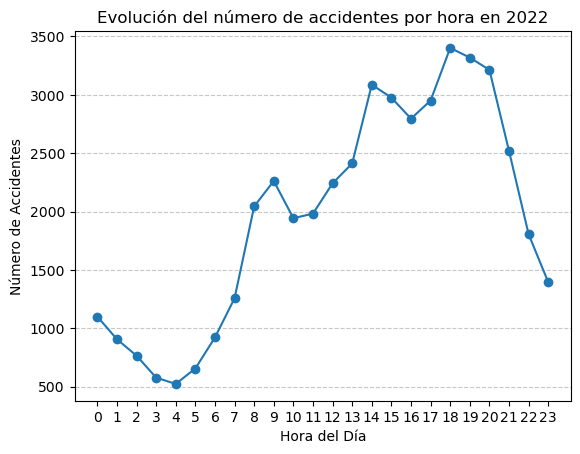

In [44]:
accidentes_df['hora'] = pd.to_datetime(accidentes_df['hora'], format='%H:%M:%S', errors='coerce')

accidentes_df_2022 = accidentes_df[accidentes_df['fecha'].dt.year == 2022].copy()  

accidentes_df_2022.loc[:, 'hora_del_dia'] = accidentes_df_2022['hora'].dt.hour

accidentes_por_hora_2022 = accidentes_df_2022.groupby('hora_del_dia').size()

plt.plot(accidentes_por_hora_2022.index, accidentes_por_hora_2022.values, marker='o')
plt.title('Evolución del número de accidentes por hora en 2022')
plt.xlabel('Hora del Día')
plt.ylabel('Número de Accidentes')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Como se puede ver, hay dos picos principales, uno alrededor de las 14:00 horas y otro alrededor de las 18:00 y 19:00 horas.
El pico alrededor de las 14:00 horas puede deberse a una serie de factores, como:
El aumento del tráfico durante la hora de la comida.

El pico alrededor de las 18:00 y 19:00 horas puede deberse a una serie de factores, como:
El aumento del tráfico a la hora de la salida del trabajo.
El cansancio de los conductores que han estado trabajando durante todo el día.
Ahora vamos a ver que tipos de accidentes hay sobre esas horas 

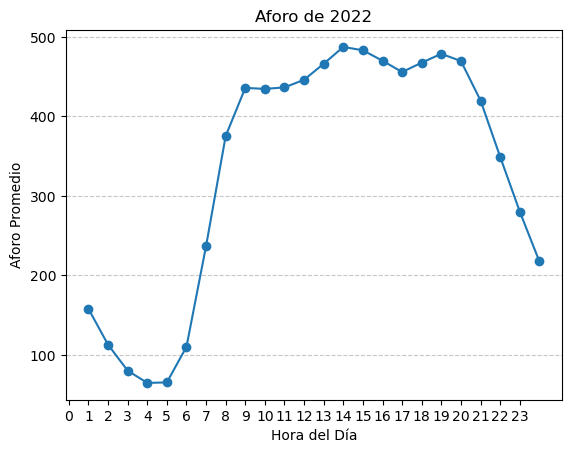

In [45]:
horas_columnas = ['HOR1', 'HOR2', 'HOR3', 'HOR4', 'HOR5', 'HOR6', 'HOR7', 'HOR8', 'HOR9', 'HOR10',
                  'HOR11', 'HOR12', 'HOR13', 'HOR14', 'HOR15', 'HOR16', 'HOR17', 'HOR18', 'HOR19',
                  'HOR20', 'HOR21', 'HOR22', 'HOR23', 'HOR24']

aforo_df_cleaned = aforo_df[horas_columnas].dropna()

aforo_df_cleaned_T = aforo_df_cleaned.T

plt.plot(range(1, 25), aforo_df_cleaned_T.mean(axis=1), marker='o')
plt.title('Aforo de 2022')
plt.xlabel('Hora del Día')
plt.ylabel('Aforo Promedio')
plt.xticks(range(24)) 
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Ahora vamos a comparar las dos graficas para ver si hay mas accidentes por que hay mas aforo a esas horas o menos

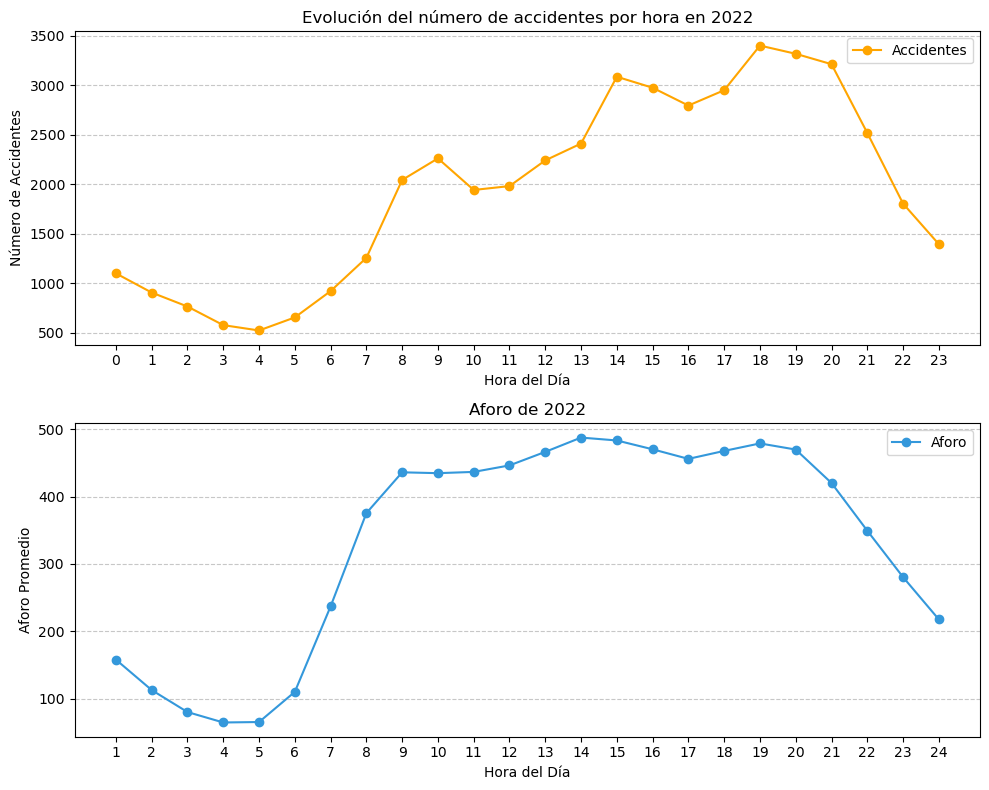

In [46]:
# Procesamiento de accidentes_df
accidentes_df['hora'] = pd.to_datetime(accidentes_df['hora'], format='%H:%M:%S', errors='coerce')
accidentes_df_2022 = accidentes_df[accidentes_df['fecha'].dt.year == 2022].copy()
accidentes_df_2022.loc[:, 'hora_del_dia'] = accidentes_df_2022['hora'].dt.hour
accidentes_por_hora_2022 = accidentes_df_2022.groupby('hora_del_dia').size()

# Procesamiento de aforo_df
horas_columnas = ['HOR1', 'HOR2', 'HOR3', 'HOR4', 'HOR5', 'HOR6', 'HOR7', 'HOR8', 'HOR9', 'HOR10',
                  'HOR11', 'HOR12', 'HOR13', 'HOR14', 'HOR15', 'HOR16', 'HOR17', 'HOR18', 'HOR19',
                  'HOR20', 'HOR21', 'HOR22', 'HOR23', 'HOR24']
aforo_df_cleaned = aforo_df[horas_columnas].dropna()
aforo_df_cleaned_T = aforo_df_cleaned.T

# Configuración de la visualización
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Gráfico 1: Accidentes
ax1.plot(accidentes_por_hora_2022.index, accidentes_por_hora_2022.values, marker='o', label='Accidentes', color='orange') 
ax1.set_title('Evolución del número de accidentes por hora en 2022')
ax1.set_xlabel('Hora del Día')
ax1.set_ylabel('Número de Accidentes')
ax1.set_xticks(range(24))
ax1.grid(axis='y', linestyle='--', alpha=0.7)
ax1.legend()

# Gráfico 2: Aforo
ax2.plot(range(1, 25), aforo_df_cleaned_T.mean(axis=1), marker='o', label='Aforo', color='#3498db')  
ax2.set_title('Aforo de 2022')
ax2.set_xlabel('Hora del Día')
ax2.set_ylabel('Aforo Promedio')
ax2.set_xticks(range(1, 25))
ax2.grid(axis='y', linestyle='--', alpha=0.7)
ax2.legend()

plt.tight_layout()
plt.show()

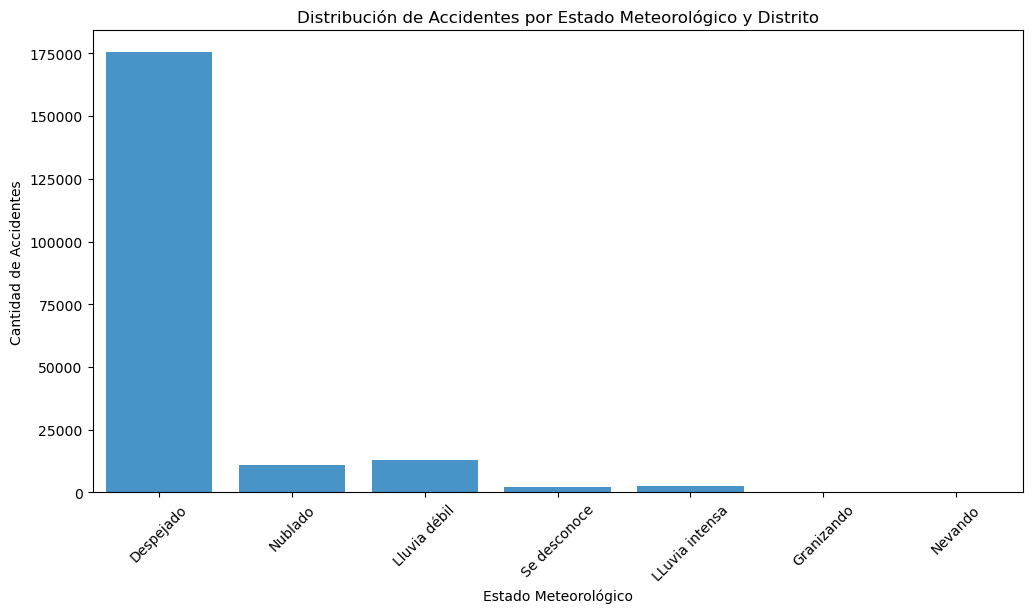

In [47]:
plt.figure(figsize=(12, 6))
sns.countplot(x='estado_meteorológico', data=accidentes_df, color='#3498db')
plt.title('Distribución de Accidentes por Estado Meteorológico y Distrito')
plt.xlabel('Estado Meteorológico')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)
plt.show()

Vemos que la mayoria de accidentes ocurren en despejado pero esto no quiere decir que es mas peligroso conducir en despejado que con lluvia intensa o debil por ello vamos a demostrarlo viendo la gravedad segun el estado meteorologico para asi ver que conducir con lluvia es mas peligroso

In [48]:
accidentes_df['grado_lesividad'] = accidentes_df['cod_lesividad'].map({
    1: 'Leve',
    2: 'Leve',
    5: 'Leve',
    6: 'Leve',
    7: 'Leve',
    3: 'Grave',
    4: 'Fallecido',
    14:'Sin Asistencia Sanitaria',
    77:'Desconocido'
})

Para ello y que nos sea mas facil creamos una nueva columna que sea grado de lesividad donde las clasificaremos en leve,grave.fallecido,Desconocido y sin assitencia sanitaria

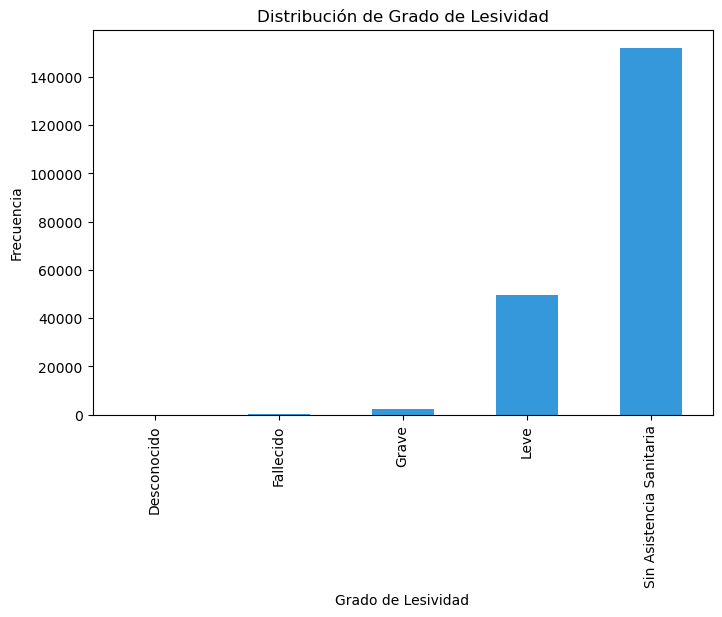

In [49]:
lesividad_df = accidentes_df['grado_lesividad']
plt.figure(figsize=(8, 5))
lesividad_df.value_counts().sort_index().plot(kind='bar', color='#3498db')
plt.title('Distribución de Grado de Lesividad')
plt.xlabel('Grado de Lesividad')
plt.ylabel('Frecuencia')
plt.show()

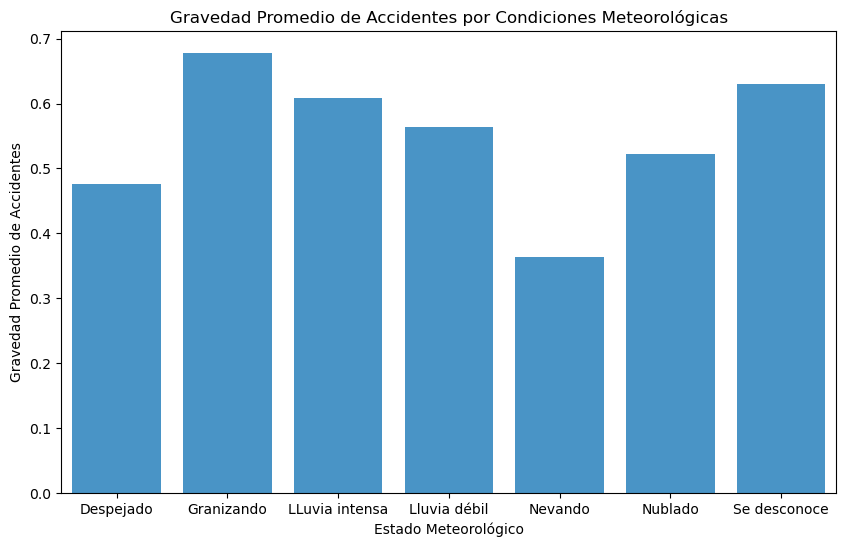

In [50]:
subset_df = accidentes_df[['estado_meteorológico', 'grado_lesividad']]
severity_by_weather = subset_df.groupby('estado_meteorológico')['grado_lesividad'].value_counts().unstack().fillna(0)
severity_by_weather['gravedad_promedio'] = (severity_by_weather['Leve'] + severity_by_weather['Leve'] * 2 +
                                            severity_by_weather['Fallecido'] * 3 + severity_by_weather['Fallecido'] * 4) / \
                                           (severity_by_weather['Grave'] + severity_by_weather['Grave'] +
                                            severity_by_weather['Sin Asistencia Sanitaria'] + severity_by_weather['Sin Asistencia Sanitaria'])
plt.figure(figsize=(10, 6))
sns.barplot(x=severity_by_weather.index, y='gravedad_promedio', data=severity_by_weather.reset_index(), color='#3498db')
plt.title('Gravedad Promedio de Accidentes por Condiciones Meteorológicas')
plt.xlabel('Estado Meteorológico')
plt.ylabel('Gravedad Promedio de Accidentes')
plt.show()

Efectivamente vemos que los accidentes son mas graves y con mas fallecidos con lluvia intensa y debil que con el estado meteorologico despejado, ahora vamos a ver que tipos de accidentes son los que mas hay con lluvia

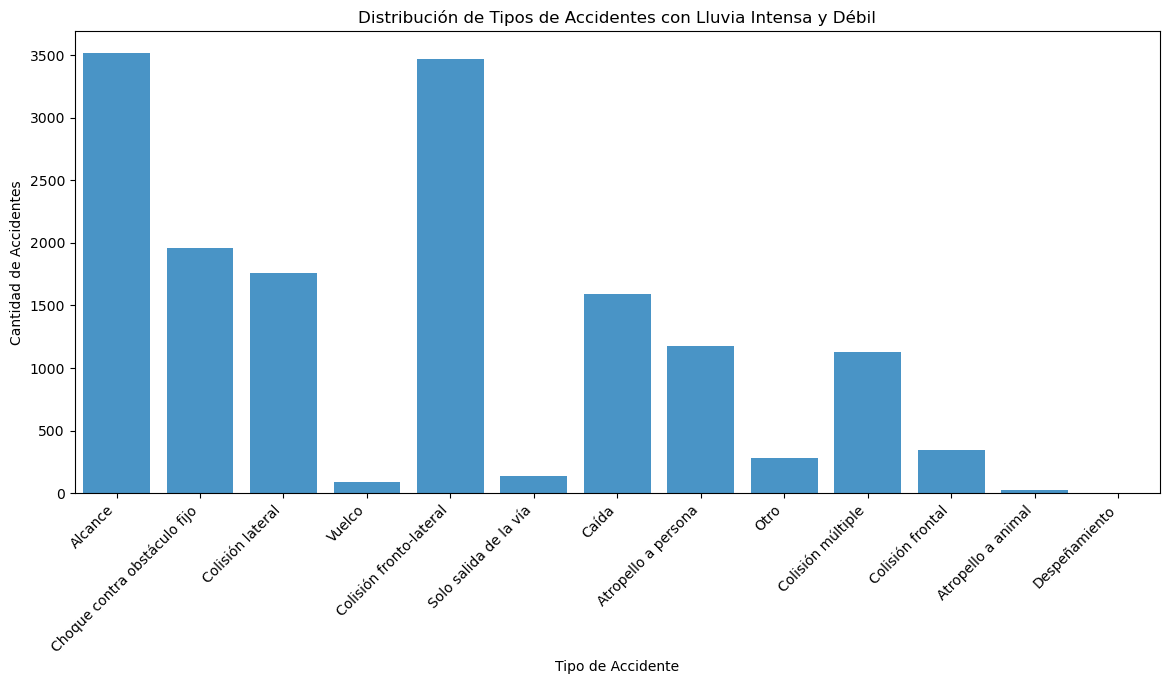

In [51]:
lluvia_intensa = accidentes_df[accidentes_df['estado_meteorológico'].isin(['LLuvia intensa'])]
lluvia_debil = accidentes_df[accidentes_df['estado_meteorológico'].isin(['Lluvia débil'])]
if not lluvia_intensa.empty or not lluvia_debil.empty:
    accidentes_lluvia = pd.concat([lluvia_intensa, lluvia_debil])
    plt.figure(figsize=(14, 6))
    sns.countplot(x='tipo_accidente', data=accidentes_lluvia, color='#3498db')
    plt.title('Distribución de Tipos de Accidentes con Lluvia Intensa y Débil')
    plt.xlabel('Tipo de Accidente')
    plt.ylabel('Cantidad de Accidentes')
    plt.xticks(rotation=45, ha='right')
    plt.show()
else:
    print("No hay datos para lluvia intensa y/o lluvia débil.")


Vemos que la mayoria de accidentes son de alcances y colisiones esto puede ser ya que con lluvia muchos conductores no guardan la distacia con el vehiculo de delante y cuando llueve la distacia de frenado aumenta esto es algo que deberian tener en cuenta

Ahora vamos a ver el porcetaje 

In [52]:
print(accidentes_df['positiva_droga'].unique())
print(accidentes_df['positiva_alcohol'].unique())


['No realizado' 1.0]
['N' 'S']


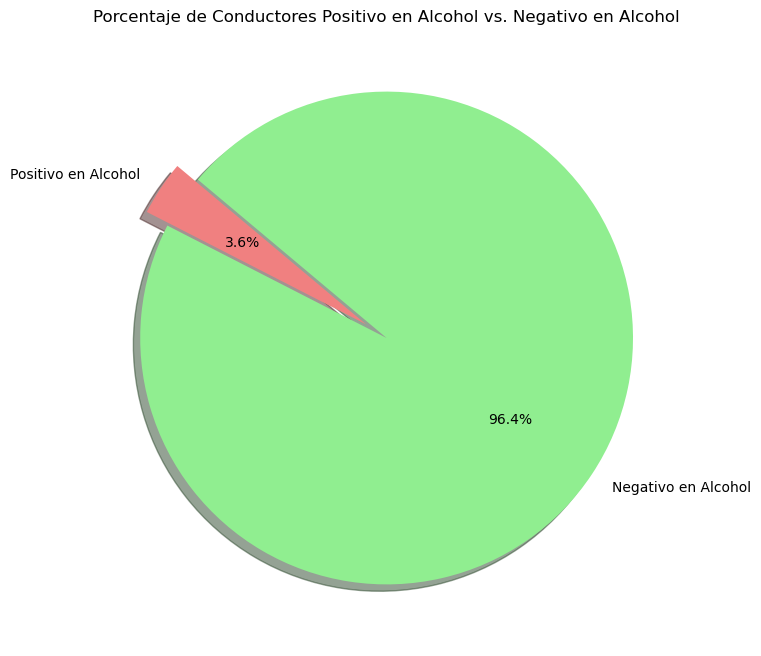

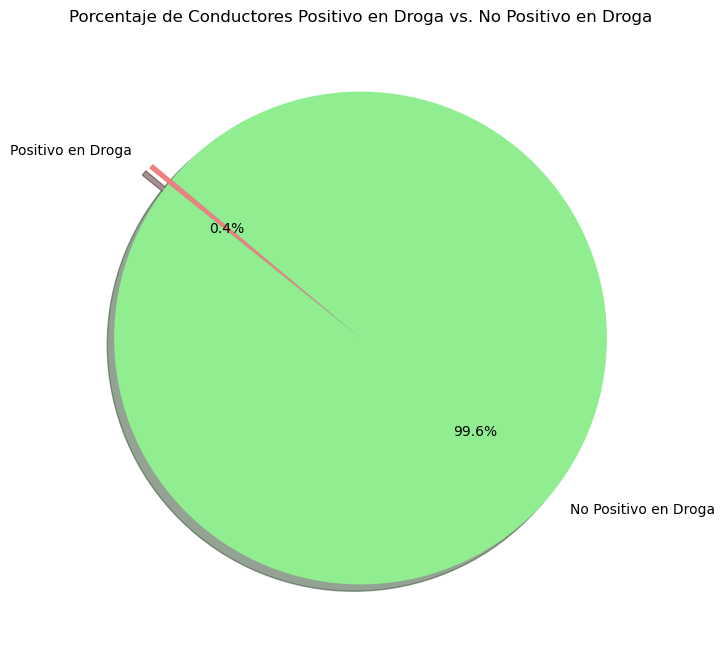

In [53]:
conductores_df = accidentes_df[accidentes_df['tipo_persona'] == 'Conductor']
porcentaje_positivo_alcohol = (conductores_df['positiva_alcohol'].value_counts(normalize=True) * 100).round(2)
porcentaje_sobrio = 100 - porcentaje_positivo_alcohol['S']
labels = ['Positivo en Alcohol', 'Negativo en Alcohol']
sizes = [porcentaje_positivo_alcohol['S'], porcentaje_sobrio]
colors = ['lightcoral', 'lightgreen']
explode = (0.1, 0)  
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Porcentaje de Conductores Positivo en Alcohol vs. Negativo en Alcohol')
plt.show()

plt.show()
conductores_droga_df = accidentes_df[accidentes_df['tipo_persona'] == 'Conductor']
porcentaje_positivo_droga = (conductores_droga_df['positiva_droga'].value_counts(normalize=True) * 100).round(2)
porcentaje_no_positivo_droga = 100 - porcentaje_positivo_droga[1.0]
labels_droga = ['Positivo en Droga', 'No Positivo en Droga']
sizes_droga = [porcentaje_positivo_droga[1.0], porcentaje_no_positivo_droga]
colors_droga = ['lightcoral', 'lightgreen']
explode_droga = (0.1, 0)  
plt.figure(figsize=(8, 8))
plt.pie(sizes_droga, explode=explode_droga, labels=labels_droga, colors=colors_droga, autopct='%1.1f%%', shadow=True,
        startangle=140)
plt.title('Porcentaje de Conductores Positivo en Droga vs. No Positivo en Droga')
plt.show()

Vemos que los positivos en alcohol y droga son pocos pero no 0, aunque haya pocos deberiamos de concienciar a los conductores a que si consumen alcohol no deben coger el coche por que no solo ponene en peligro a si mismos si no que tambien a otras personas y lo mismo para los casos de positiva droga.

Ahora vamos a ver los cosas de positivo_alcohol segun el sexo

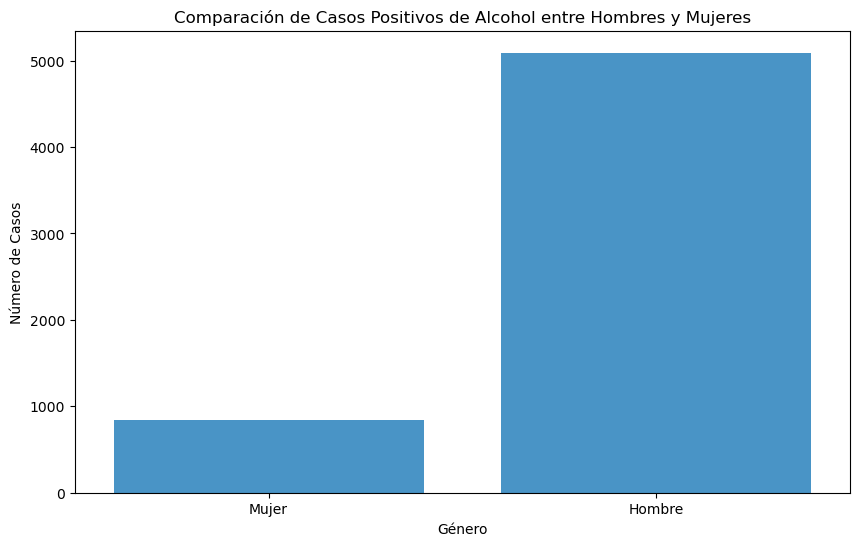

In [54]:
positivo_alcohol_sexo_df = accidentes_df[(accidentes_df['positiva_alcohol'] == 'S') & (accidentes_df['sexo'].isin(['Hombre', 'Mujer']))]

plt.figure(figsize=(10, 6))
sns.countplot(x='sexo', data=positivo_alcohol_sexo_df, color='#3498db')
plt.title('Comparación de Casos Positivos de Alcohol entre Hombres y Mujeres')
plt.xlabel('Género')
plt.ylabel('Número de Casos')
plt.show()

Esto no quiere decir que los hombres seamos mas imprudentes, puede ser por que hay mas hombres al volante que mujeres y por lo tanto los hombres son los que mas estas implicados en un accidente

Para obtener una comprensión más completa, vamos a normalizar los resultados en función del número total de hombres y mujeres involucrados en accidentes. Esto te dará una tasa relativa de casos de positivo alcohol en relación con la cantidad total de hombres y mujeres involucrados en accidentes.

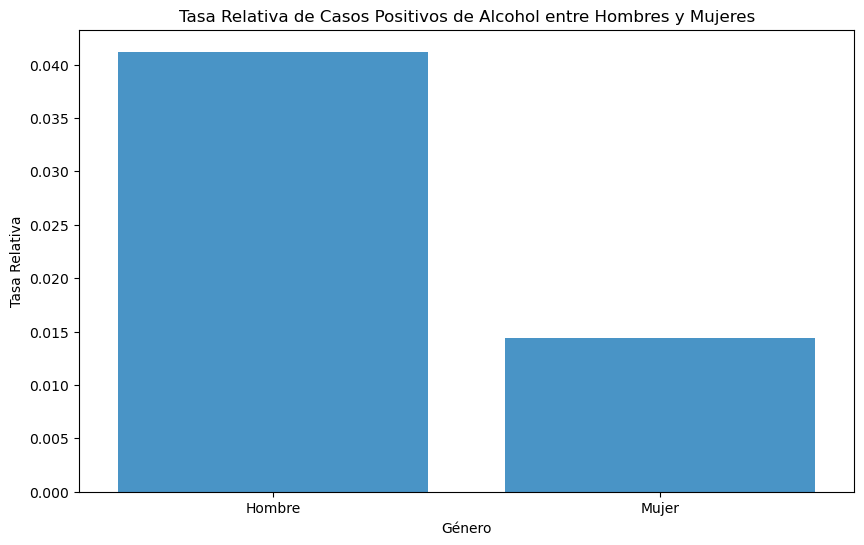

In [55]:
positivo_alcohol_sexo_df = accidentes_df[(accidentes_df['positiva_alcohol'] == 'S') & (accidentes_df['sexo'].isin(['Hombre', 'Mujer']))]

total_por_genero = accidentes_df[accidentes_df['sexo'].isin(['Hombre', 'Mujer'])]['sexo'].value_counts()

positivo_alcohol_por_genero = positivo_alcohol_sexo_df['sexo'].value_counts()

tasa_relativa = positivo_alcohol_por_genero / total_por_genero

plt.figure(figsize=(10, 6))
sns.barplot(x=tasa_relativa.index, y=tasa_relativa.values, color='#3498db')
plt.title('Tasa Relativa de Casos Positivos de Alcohol entre Hombres y Mujeres')
plt.xlabel('Género')
plt.ylabel('Tasa Relativa')
plt.show()


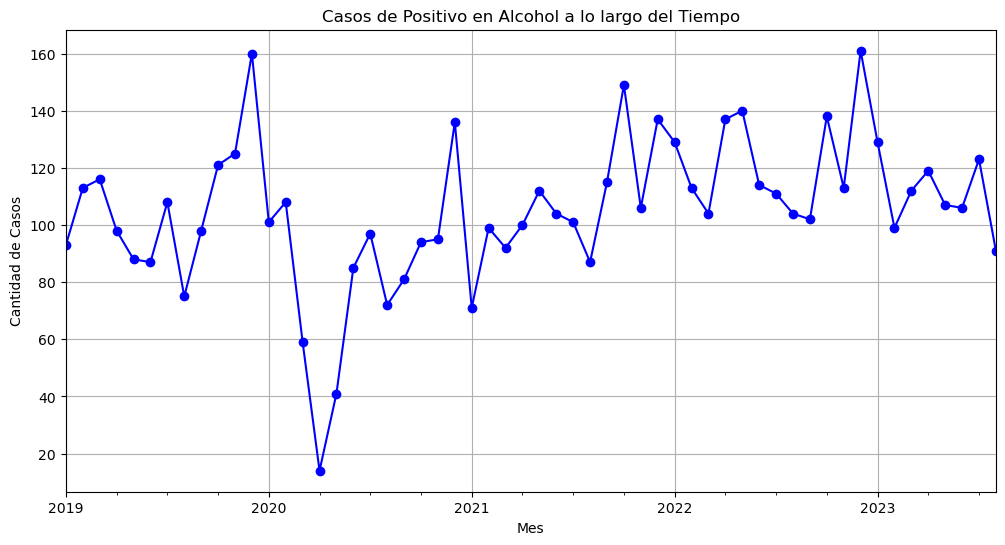

In [56]:
positivo_alcohol_df = accidentes_df[(accidentes_df['tipo_persona'] == 'Conductor') & (accidentes_df['positiva_alcohol'] == 'S')]
casos_por_mes = positivo_alcohol_df['fecha'].groupby(positivo_alcohol_df['fecha'].dt.to_period("M")).count()
plt.figure(figsize=(12, 6))
casos_por_mes.plot(marker='o', linestyle='-', color='blue')
plt.title('Casos de Positivo en Alcohol a lo largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Casos')
plt.grid(True)
plt.show()

Vemos que siempre a finales de año hay una subida repentida de casos positivos es puede ser ya que muchos podrian coger el coche despues de la cena de navidad o despues de festejar en año nuevo

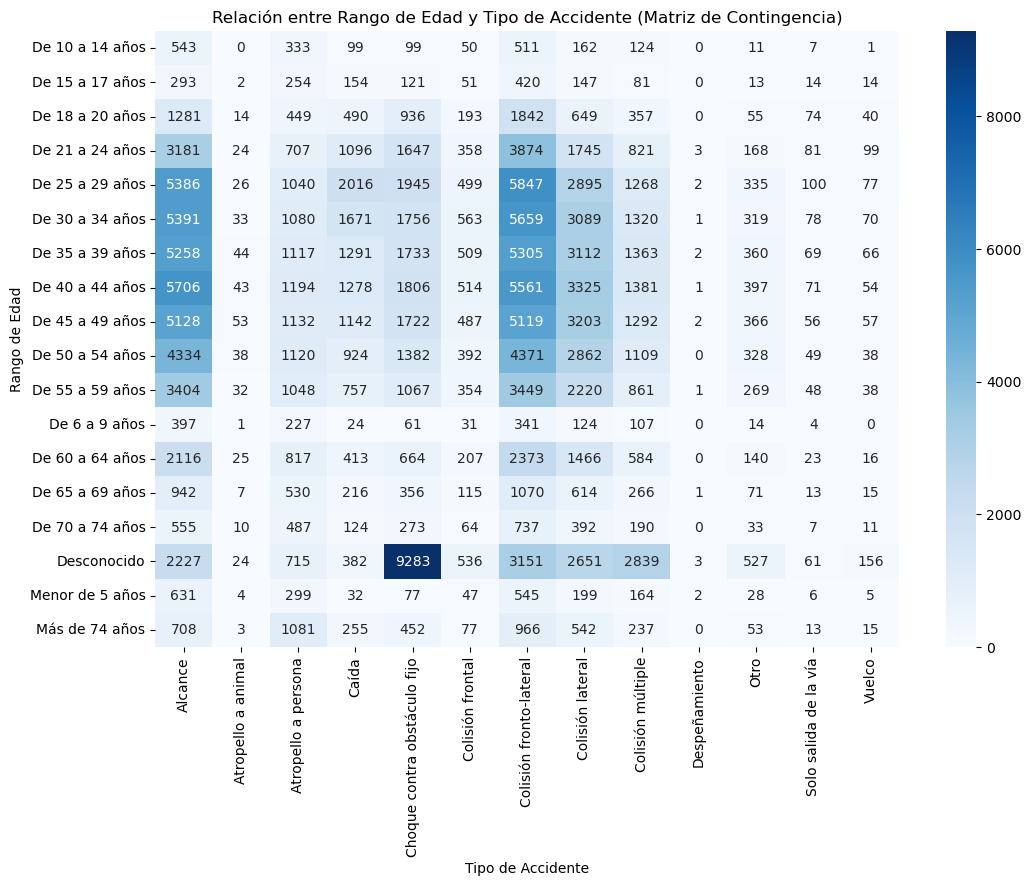

In [57]:
tabla_contingencia_sin_margenes = pd.crosstab(accidentes_df['rango_edad'], accidentes_df['tipo_accidente'])
plt.figure(figsize=(12, 8))
sns.heatmap(tabla_contingencia_sin_margenes, annot=True, cmap='Blues', fmt='g')
plt.title('Relación entre Rango de Edad y Tipo de Accidente (Matriz de Contingencia)')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Rango de Edad')
plt.show()

Vemos que las personas en este rango de edad suelen estar más ocupadas y estresadas que otros grupos y tambien las personas en este rango de edad suelen tener más experiencia en la conducción que otros grupos demográficos pero tambien es una seguridad falsa.

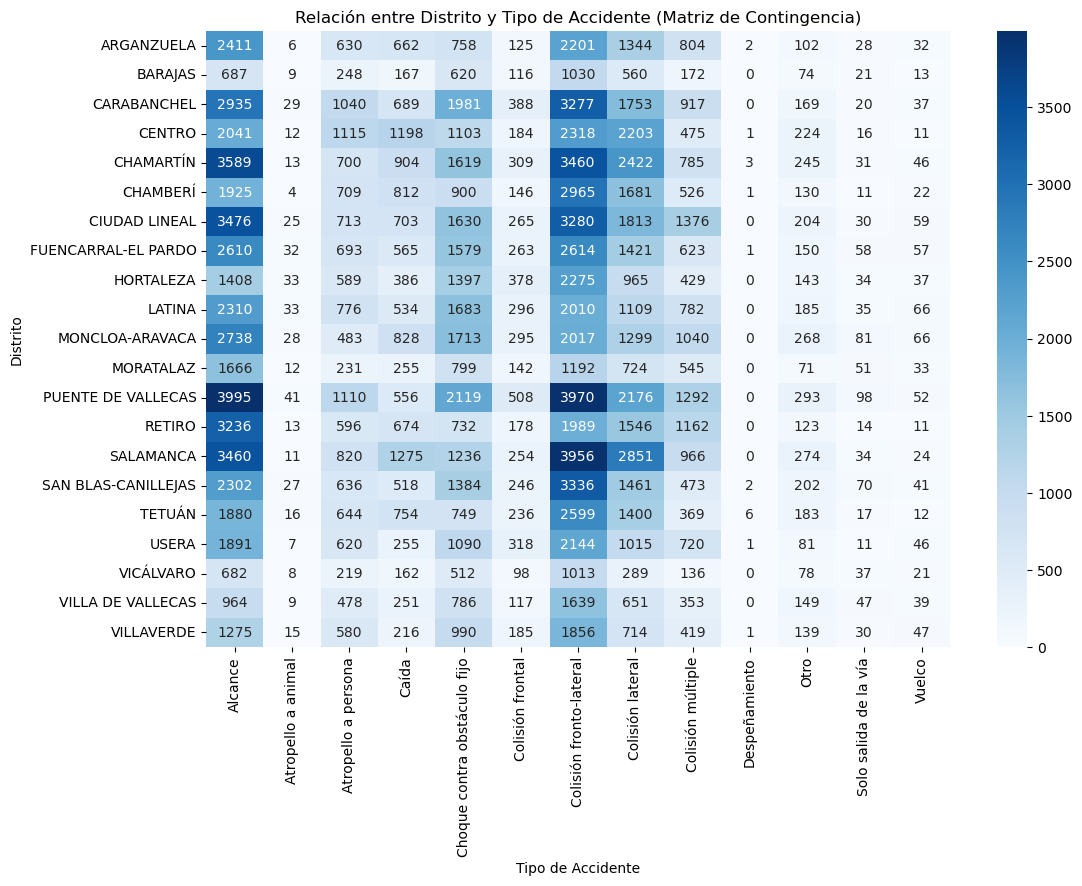

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Asumiendo que tienes una columna 'distrito' en tu DataFrame
tabla_contingencia_distrito_atropello = pd.crosstab(accidentes_df['distrito'], accidentes_df['tipo_accidente'])

plt.figure(figsize=(12, 8))
sns.heatmap(tabla_contingencia_distrito_atropello, annot=True, cmap='Blues', fmt='g')
plt.title('Relación entre Distrito y Tipo de Accidente (Matriz de Contingencia)')
plt.xlabel('Tipo de Accidente')
plt.ylabel('Distrito')
plt.show()


Para empezar voy hacer una media de cada actuacion de bomberos por año para ver cual es su progresión y que tipo de actuacion ha destacado en cada año e investigar mas a fondo.

In [59]:
numeric_columns = bomberos_df.select_dtypes(include='number').columns
means_by_year = bomberos_df.groupby('AÑO')[numeric_columns].mean()
print(means_by_year)

         AÑO     FUEGOS  DAÑOS EN CONSTRUCCION  SALVAMENTOS Y RESCATES  \
AÑO                                                                      
2018  2018.0  20.883721               7.538760               19.062016   
2019  2019.0  22.826255               6.976834               18.034749   
2020  2020.0  16.688716               5.992218               21.614786   
2021  2021.0  17.868217               8.046512               24.019380   
2022  2022.0  17.250951               5.840304               22.749049   
2023  2023.0  19.297980               7.393939               27.287879   

      DAÑOS POR AGUA  INCIDENTES DIVERSOS  SALIDAS SIN INTERVENCION  \
AÑO                                                                   
2018        8.155039            27.224806                  9.158915   
2019        8.100386            28.084942                  7.173745   
2020        7.058366            23.708171                 13.517510   
2021        8.244186            18.759690           

En 2023 se observa un aumento significativo en el promedio de 'SALVAMENTOS Y RESCATES' y un aumento en 'DAÑOS POR AGUA' en comparación con años anteriores.Nos damos cuenta que en septiembre de 2023 ocurrio una DANNA donde se rompieron muchas infraestructuras y tormentas muy fuertes.

In [60]:
descripcion_estadistica = bomberos_df.describe()
print(descripcion_estadistica)

               AÑO       FUEGOS  DAÑOS EN CONSTRUCCION  \
count  1493.000000  1493.000000            1493.000000   
mean   2020.403885    19.127261               6.944407   
std       1.665664    12.622903               8.335073   
min    2018.000000     0.000000               0.000000   
25%    2019.000000    11.000000               2.000000   
50%    2020.000000    16.000000               5.000000   
75%    2022.000000    25.000000               9.000000   
max    2023.000000    92.000000             160.000000   

       SALVAMENTOS Y RESCATES  DAÑOS POR AGUA  INCIDENTES DIVERSOS  \
count             1493.000000     1493.000000          1493.000000   
mean                21.920295        8.362358            23.387140   
std                 11.792541        6.255559            16.861688   
min                  0.000000        0.000000             0.000000   
25%                 14.000000        4.000000            12.000000   
50%                 21.000000        7.000000            

In [61]:
correlaciones = bomberos_df.corr()

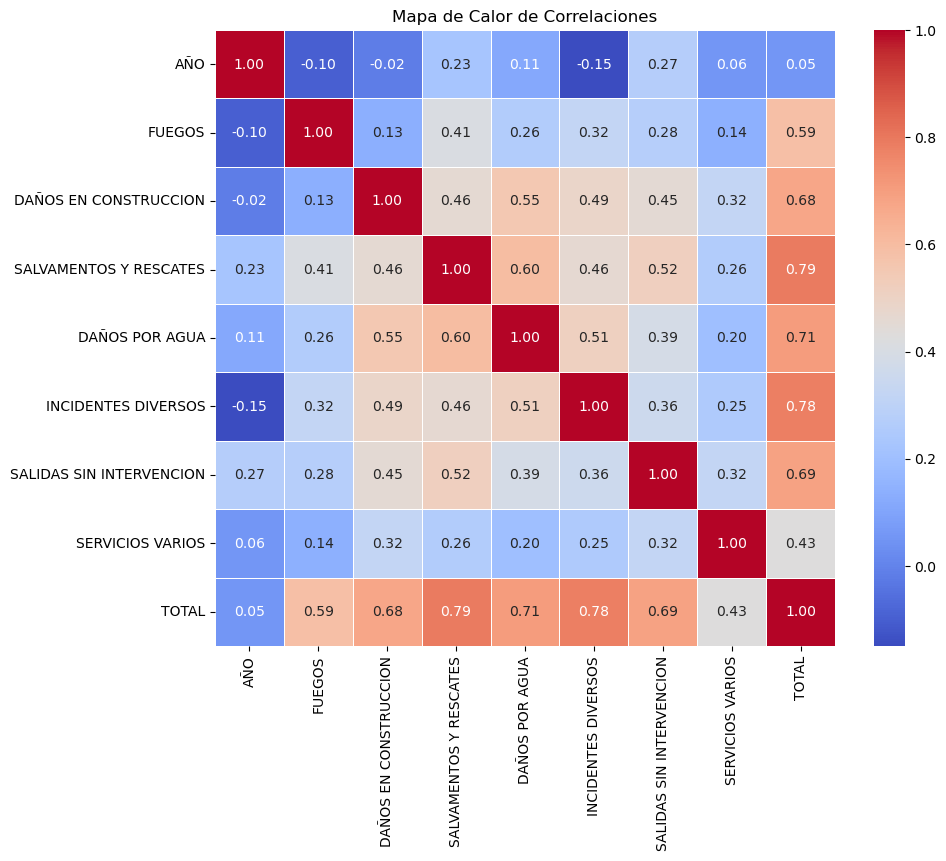

In [62]:
correlaciones = bomberos_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlaciones')
plt.show()

Una correlación positiva moderada sugiere que, en general, a medida que aumentan los daños por agua, también tiende a aumentar el número de salvamentos y rescates. Podría haber una relación causal directa o ambas variables podrían estar influenciadas por algún otro factor.

Una correlación positiva moderada indica que hay una tendencia a que aumenten juntos los daños por agua y los incidentes diversos. Esto podría sugerir que ciertos tipos de incidentes diversos están asociados con mayores daños por agua.

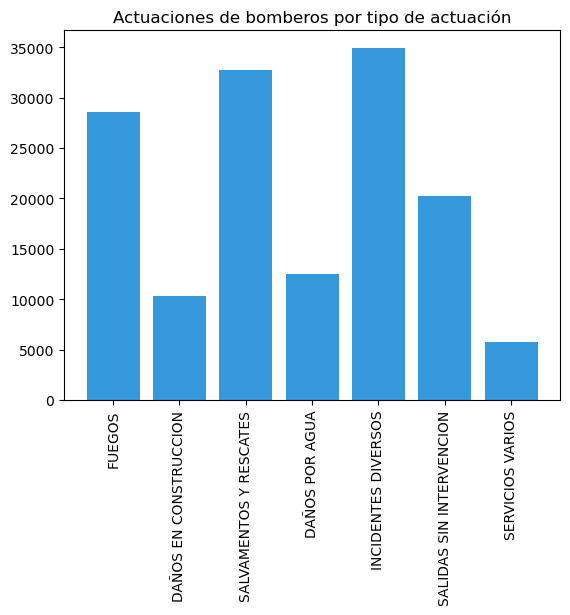

In [63]:
datos = bomberos_df[['FUEGOS', 'DAÑOS EN CONSTRUCCION', 'SALVAMENTOS Y RESCATES', 'DAÑOS POR AGUA', 'INCIDENTES DIVERSOS', 'SALIDAS SIN INTERVENCION', 'SERVICIOS VARIOS']].sum()
plt.bar(datos.index, datos.values, color='#3498db')
plt.title("Actuaciones de bomberos por tipo de actuación")
plt.xticks(rotation=90)
plt.show()

Muestra el número de actuaciones de bomberos por tipo de actuación. El gráfico muestra que los salvamentos y rescates fueron el tipo de actuación más frecuente y que los servicios varios son el tipo de actuación menos frecuente.

<Figure size 1200x600 with 0 Axes>

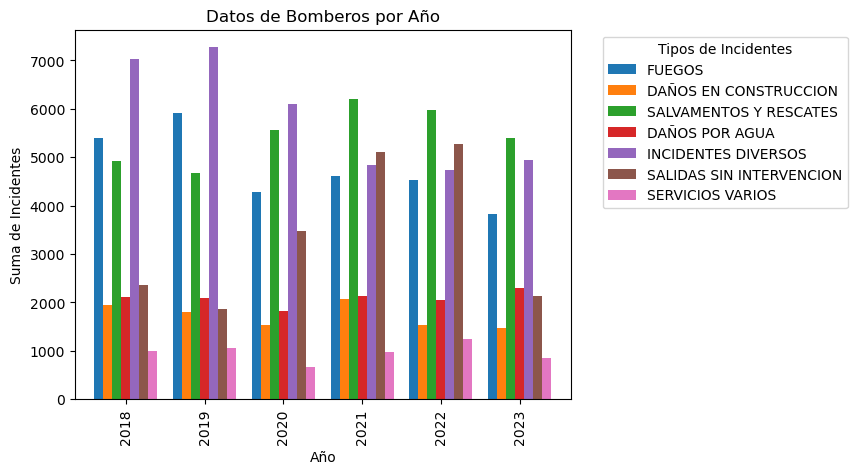

In [64]:
bomberos_df['AÑO'] 
datos_por_año = bomberos_df.groupby('AÑO')[['FUEGOS', 'DAÑOS EN CONSTRUCCION', 'SALVAMENTOS Y RESCATES', 'DAÑOS POR AGUA', 'INCIDENTES DIVERSOS', 'SALIDAS SIN INTERVENCION', 'SERVICIOS VARIOS']].sum()
plt.figure(figsize=(12, 6))
datos_por_año.plot(kind='bar', width=0.8)
plt.title('Datos de Bomberos por Año')
plt.xlabel('Año')
plt.ylabel('Suma de Incidentes')
plt.legend(title='Tipos de Incidentes', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

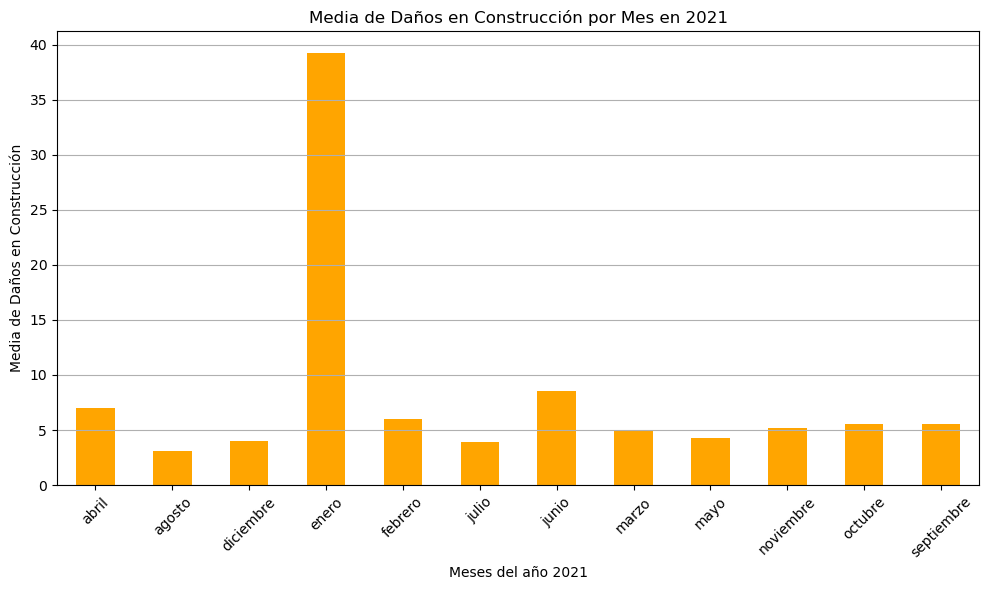

El mes con la mayor media de daños en construcción es enero con una media de 39.24 daños.


In [65]:
data_2021 = bomberos_df[bomberos_df['AÑO'] == 2021]

danios_por_mes_media = data_2021.groupby('MES')['DAÑOS EN CONSTRUCCION'].mean()

plt.figure(figsize=(10, 6))
danios_por_mes_media.plot(kind='bar', color='orange')
plt.xlabel('Meses del año 2021')
plt.ylabel('Media de Daños en Construcción')
plt.title('Media de Daños en Construcción por Mes en 2021')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

mes_max_danios_media = danios_por_mes_media.idxmax()
max_danios_media = danios_por_mes_media.max()

print(f"El mes con la mayor media de daños en construcción es {mes_max_danios_media} con una media de {max_danios_media:.2f} daños.")


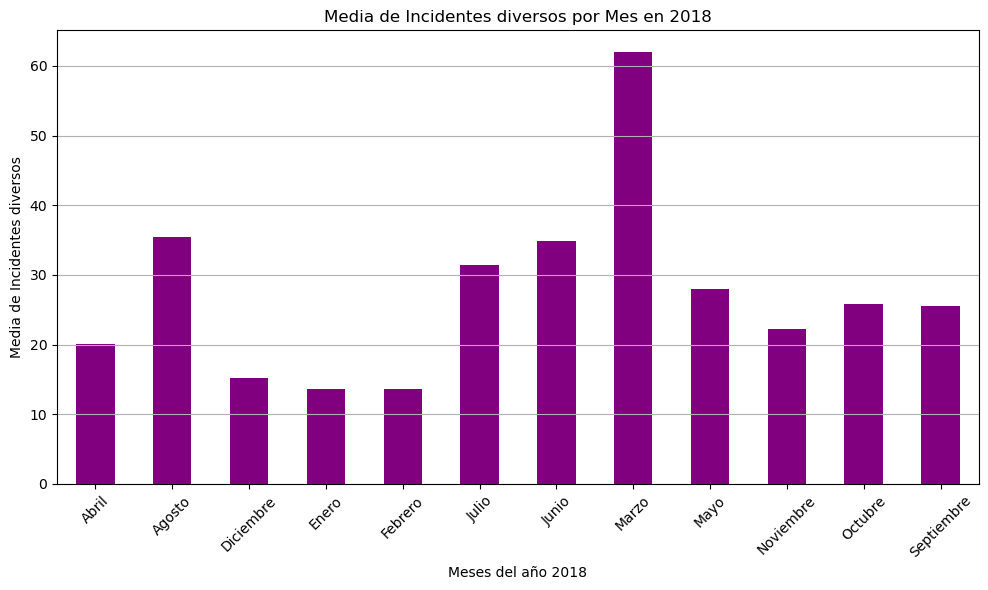

El mes con la mayor media de incidentes diversos es Marzo con una media de 62.00 incidentes.


In [66]:
data_2021 = bomberos_df[bomberos_df['AÑO'] == 2018]
incidentes_por_mes_media = data_2021.groupby('MES')['INCIDENTES DIVERSOS'].mean()
plt.figure(figsize=(10, 6))
incidentes_por_mes_media.plot(kind='bar', color='purple')
plt.xlabel('Meses del año 2018')
plt.ylabel('Media de Incidentes diversos')
plt.title('Media de Incidentes diversos por Mes en 2018')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()

plt.show()

mes_max_incidentes = incidentes_por_mes_media.idxmax()
max_incidentes = incidentes_por_mes_media.max()

print(f"El mes con la mayor media de incidentes diversos es {mes_max_incidentes} con una media de {max_incidentes:.2f} incidentes.")

<Figure size 1200x800 with 0 Axes>

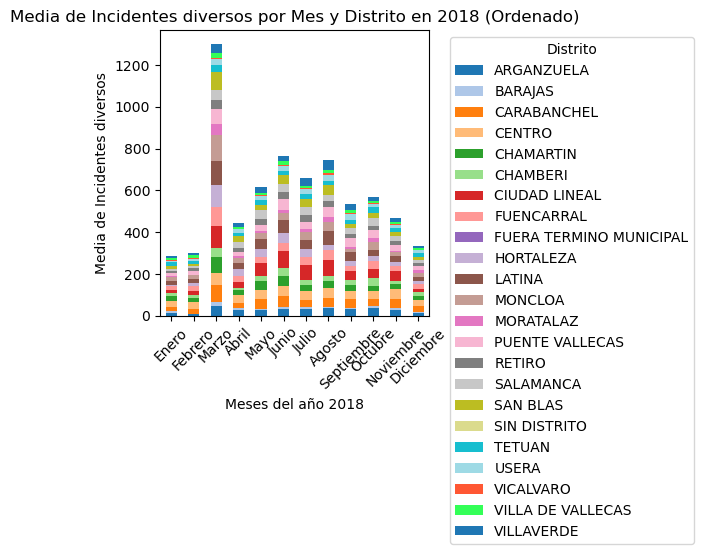

El mes con la mayor media de incidentes diversos por distrito es: 
DISTRITO
ARGANZUELA                  Marzo
BARAJAS                     Marzo
CARABANCHEL                 Marzo
CENTRO                      Marzo
CHAMARTIN                   Marzo
CHAMBERI                    Marzo
CIUDAD LINEAL               Marzo
FUENCARRAL                  Marzo
FUERA TERMINO MUNICIPAL     Abril
HORTALEZA                   Marzo
LATINA                      Marzo
MONCLOA                     Marzo
MORATALAZ                   Marzo
PUENTE VALLECAS             Marzo
RETIRO                      Marzo
SALAMANCA                   Marzo
SAN BLAS                    Marzo
SIN DISTRITO                Junio
TETUAN                      Marzo
USERA                       Marzo
VICALVARO                  Agosto
VILLA DE VALLECAS           Marzo
VILLAVERDE                 Agosto
dtype: object 
con una media de: 
DISTRITO
ARGANZUELA                  48.0
BARAJAS                     16.0
CARABANCHEL                 85.0


In [67]:
data_2018 = bomberos_df[bomberos_df['AÑO'] == 2018]

orden_meses = [
    'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
    'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'
]

incidentes_por_mes_distrito_media = data_2018.groupby(['MES', 'DISTRITO'])['INCIDENTES DIVERSOS'].mean().unstack()
incidentes_por_mes_distrito_media = incidentes_por_mes_distrito_media.reindex(orden_meses)

colores_tab20 = plt.cm.tab20(np.linspace(0, 1, 20))

colores_adicionales = ['#FF5733', '#33FF57'] 

colores_distritos = list(colores_tab20) + colores_adicionales

plt.figure(figsize=(12, 8))
incidentes_por_mes_distrito_media.plot(kind='bar', stacked=True, color=colores_distritos)
plt.xlabel('Meses del año 2018')
plt.ylabel('Media de Incidentes diversos')
plt.title('Media de Incidentes diversos por Mes y Distrito en 2018 (Ordenado)')
plt.xticks(rotation=45)
plt.legend(title='Distrito', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

mes_max_incidentes_por_distrito = incidentes_por_mes_distrito_media.idxmax()
max_incidentes_por_distrito = incidentes_por_mes_distrito_media.max()

print(f"El mes con la mayor media de incidentes diversos por distrito es: \n{mes_max_incidentes_por_distrito} \ncon una media de: \n{max_incidentes_por_distrito}")


In [68]:
print(radares_df.columns)


Index(['Nº\nRADAR', 'Ubicacion', 'DISTRITOS', 'Carretara o vial',
       'UBICACIÓN\nCalle 30', 'PK', 'Sentido', 'Tipo', 'X (WGS84)',
       'Y (WGS84)', 'Longitud', 'Latitud', 'Coordenadas'],
      dtype='object')


In [69]:
import folium
from IPython.display import display

m = folium.Map(location=[radares_df['Latitud'].mean(), radares_df['Longitud'].mean()], zoom_start=12)

for index, row in radares_df.iterrows():
    popup_text = "RADAR: {}".format(row['Nº\nRADAR'])
    folium.Marker([row['Latitud'], row['Longitud']], popup=popup_text).add_to(m)

display(m)


<h2 align=center style="font-family: 'Times New Roman', sans-serif"> Examen Open data I </h2>

Hacer una agrupación de los distritos de la zona norte y de la zona sur, calcular la desviación típica de las dos zonas y contar un poco lo que sale

NORTE: Fuencarral-el pardo, Hortaleza, Tetuan, Moncloa-Aravaca, Chamartin, Barajas, Chamberí, Salamanca, Ciudad lineal, San-Blas

In [70]:
distritos_norte = ['CHAMARTÍN', 'FUENCARRAL-EL PARDO', 'SAN BLAS-CANILLEJAS', 'TETUÁN', 'MONCLOA-ARAVACA', 'BARAJAS', 'HORTALEZA', 'CHAMBERÍ', 'SALAMANCA', 'CIUDAD LINEAL', 'CENTRO']

accidentes_en_distrito_norte = accidentes_df[accidentes_df['distrito'].isin(distritos_norte)]

accidentes_por_distrito_norte = accidentes_en_distrito_norte.groupby('distrito').size()

desviacion_tipica_accidentes_norte = accidentes_por_distrito_norte.std()

print(f"La cantidad de accidentes en los distritos del norte es: {cantidad_accidentes_en_distrito_norte}")
print(f"La desviación típica del número de accidentes por distrito en el norte es: {desviacion_tipica_accidentes_norte}")

NameError: name 'cantidad_accidentes_en_distrito_norte' is not defined

SUR: USERA, PUENTE DE VALLECAS, VILLAVERDE, CARABANCHEL, LATINA, MORATALAZ, VICALVARO, ARGANZUELA, RETIRO, SALAMANCA

In [ ]:
distritos_sur = ['USERA', 'PUENTE DE VALLECAS', 'VILLAVERDE', 'CARABANCHEL', 'LATINA', 
                 'MORATALAZ', 'VICALVARO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA']

accidentes_en_distrito_sur = accidentes_df[accidentes_df['distrito'].isin(distritos_sur)]

accidentes_por_distrito_sur = accidentes_en_distrito_sur.groupby('distrito').size()

desviacion_tipica_accidentes_sur = accidentes_por_distrito_sur.std()

print(f"La cantidad de accidentes en los distritos del sur es: {cantidad_accidentes_en_distrito_sur}")
print(f"La desviación típica del número de accidentes por distrito en el sur es: {desviacion_tipica_accidentes_sur}")

In [ ]:
distritos_norte = ['CHAMARTÍN', 'FUENCARRAL-EL PARDO', 'SAN BLAS-CANILLEJAS', 'TETUÁN', 'MONCLOA-ARAVACA', 'BARAJAS', 'HORTALEZA', 'CHAMBERÍ', 'SALAMANCA', 'CIUDAD LINEAL', 'CENTRO']
distritos_sur = ['USERA', 'PUENTE DE VALLECAS', 'VILLAVERDE', 'CARABANCHEL', 'LATINA', 'MORATALAZ', 'VICALVARO', 'ARGANZUELA', 'RETIRO', 'SALAMANCA']

accidentes_en_distrito_norte = accidentes_df[accidentes_df['distrito'].isin(distritos_norte)]
accidentes_en_distrito_sur = accidentes_df[accidentes_df['distrito'].isin(distritos_sur)]

accidentes_por_distrito_norte = accidentes_en_distrito_norte.groupby('distrito').size()
accidentes_por_distrito_sur = accidentes_en_distrito_sur.groupby('distrito').size()

desviacion_tipica_accidentes_norte = accidentes_por_distrito_norte.std()
desviacion_tipica_accidentes_sur = accidentes_por_distrito_sur.std()

plt.bar(['Norte', 'Sur'], [desviacion_tipica_accidentes_norte, desviacion_tipica_accidentes_sur], color='#3498db')
plt.title('Desviación Típica del Número de Accidentes por Zona')
plt.xlabel('Zona')
plt.ylabel('Desviación Típica')
plt.show()

La desviación estándar es una medida de dispersión que indica cuánto se alejan los valores individuales de la media de un conjunto de datos. En este caso que nosotros estamos trabajando con los datos de los accidentes en distritos de Madrid, la desviación estándar del número de accidentes por distrito proporciona información sobre la variabilidad o dispersión de la cantidad de accidentes entre los diferentes distritos.

Distritos del Sur (Desviación Estándar: 3685.41):

Una desviación estándar relativamente alta indica que la cantidad de accidentes tiende a variar significativamente entre los distintos distritos del sur.
Es posible que haya algunos distritos con una frecuencia de accidentes significativamente mayor o menor que la media de la región.

Distritos del Norte (Desviación Estándar: 3156.03):

Aunque hay más accidentes en total en los distritos del norte, la desviación estándar indica que la variabilidad entre los distritos es menor en comparación con los del sur.
La frecuencia de accidentes en los distritos del norte tiende a estar más cerca de la media general de la zona.

En términos prácticos, una mayor desviación estándar sugiere que puede ser necesario prestar una atención especial a la planificación de medidas de seguridad vial en ciertos distritos del sur, ya que la frecuencia de accidentes varía más ampliamente. Por otro lado, en los distritos del norte, aunque hay más accidentes en general, la variabilidad entre distritos es menor, lo que puede indicar cierta homogeneidad en la frecuencia de accidentes

In [71]:
import pandas as pd

In [72]:
with pd.ExcelWriter('accidentes_limpios.xlsx') as writer:
    accidentes_df.to_excel(writer, sheet_name='Sheet1', index=False)

In [73]:
with pd.ExcelWriter('bomberos_limpios.xlsx') as writer:
    bomberos_df.to_excel(writer, sheet_name='Sheet1', index=False)

In [74]:
with pd.ExcelWriter('aforo.xlsx') as writer:
    aforo_df.to_excel(writer, sheet_name='Sheet1', index=False)

In [75]:
with pd.ExcelWriter('RadaresMadrid.xlsx') as writer:
    radares_df.to_excel(writer, sheet_name='Sheet1', index=False)